# Dimensionality reducion on MNIST digit data

In [1]:
%pip install python-mnist
%matplotlib inline

import time
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Train data")
print(f"X Train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("*"*100)
print("Test data")
print(f"X Test: {X_test.shape}")
print(f"Y Text: {y_test.shape}")


Train data
X Train: (60000, 28, 28)
y train: (60000,)
****************************************************************************************************
Test data
X Test: (10000, 28, 28)
Y Text: (10000,)


From the data above, we can already tell a few things
<li>The Train and test data has 60000 and 10000 images respectively</li>
<li>The images have a dimention of 28 by 28 pixels</li>

### Plotting the images

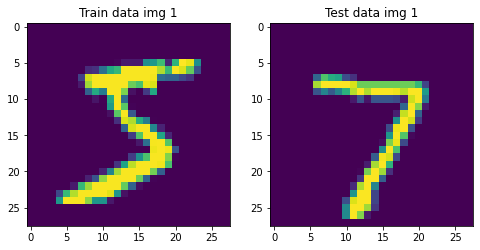

In [3]:
# Plot the first image on the train and test data

fig = plt.figure(figsize=(8,4))

fig.add_subplot(121)
plt.title("Train data img 1")
img_train = y_train[0]
plt.imshow(X_train[0])

fig.add_subplot(122)
plt.title("Test data img 1")
img_test = y_test[0]
plt.imshow(X_test[0])

plt.show()

# display(X_train)

The above images show that the digit images are in <strong>RGB colour channels</strong> and we need to turn them into grayscale
<br>


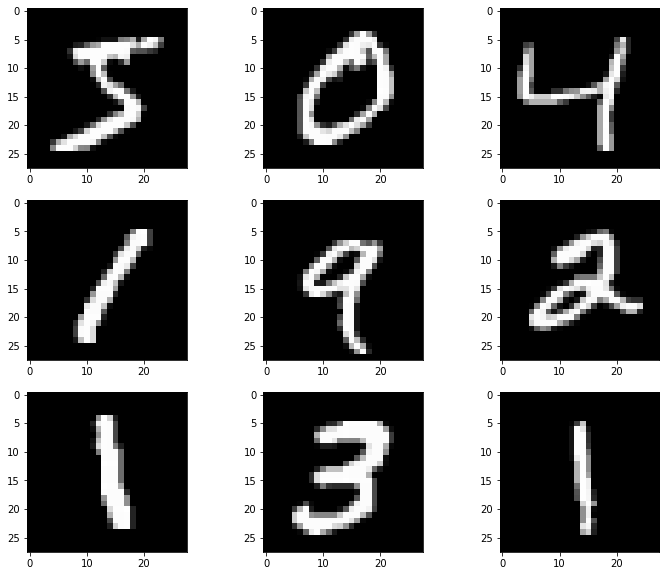

In [4]:
#  We can go further to plot the first few images in train
fig = plt.figure(figsize = (12,10))

for imgs in range(9):
    fig.add_subplot(330 + 1 + imgs)
    plt.imshow(X_train[imgs], cmap='gray')
plt.show()

### Reashaping

Since we are interesed in dimentionality reduction, <br>we will need to reshape the data arrays into a <strong>single colour channel</strong>

In [5]:
# Reshape the X_train and X_test

display(X_train.shape)


Xtrain = X_train.reshape((X_train.shape[0], 28,28,1))
Xtest = X_test.reshape((X_test.shape[0], 28,28,1))

print(f"After reshaping, we get \n\tX_test dim: {X_test.shape}\n\tX_train dim: {X_train.shape}")

(60000, 28, 28)

After reshaping, we get 
	X_test dim: (10000, 28, 28)
	X_train dim: (60000, 28, 28)


#### Transforming the data into High dimention
<li>Part 1: Use the 10 categories and see the result</li>
<li>Part 2: Use the 784 fratures <strong>28 X 28 </strong> and see the result</li>

### Part 1: Using the 10 categorical digits

In [6]:
Ytrain = to_categorical(y_train)
Ytest = to_categorical(y_test)

print(Ytrain[0])
print('*'*100)
print(Ytrain.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
****************************************************************************************************
(60000, 10)


From the results above we can see that the Ytrain shape after one hot encoding we get 10 categories. <br>
This is because the digits range from 0 -9 which are 10 10 categories


In [7]:
type(Ytrain)

numpy.ndarray

## Visualizaton using t-SNE

T-Dristribted Stochastic Neighbour Embedding (t-SNE) is a non linear dimentionality reduction techique that well suits vizualization of high dimension data especially on a 2D plot using conditional probalbility.<br>
t-SNE uses Gausian distribution

#### Converng data into a pandas dataframe for easier handling

In [8]:
cols = np.arange(10)

train_df = pd.DataFrame(Ytrain, columns = cols)
train_df.head()

print('-'*100)
display(train_df.value_counts())

----------------------------------------------------------------------------------------------------


0    1    2    3    4    5    6    7    8    9  
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    6742
     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0    6265
               1.0  0.0  0.0  0.0  0.0  0.0  0.0    6131
          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    5958
          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    5949
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    5923
0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0    5918
                              0.0  0.0  1.0  0.0    5851
                    1.0  0.0  0.0  0.0  0.0  0.0    5842
                    0.0  1.0  0.0  0.0  0.0  0.0    5421
dtype: int64

In [9]:

start_time = time.time()
tsne = TSNE(n_components = 2, verbose=1, learning_rate=300, n_iter=300)
tsne_result = tsne.fit_transform(X=train_df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))
tsne_result.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 11.688s...
[t-SNE] Computed neighbors for 60000 samples in 38.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

(60000, 2)

In [10]:
tsne_df = pd.DataFrame({"t-SNE 1":tsne_result[:,0], "t-SNE 2":tsne_result[:,1]})
tsne_df.head()

,t-SNE 1,t-SNE 2
0,-2.578431,3.227650
1,1.255560,-2.966019
2,4.897130,-0.075099
3,-0.821152,0.477441
4,0.431805,4.888453


No handles with labels found to put in legend.


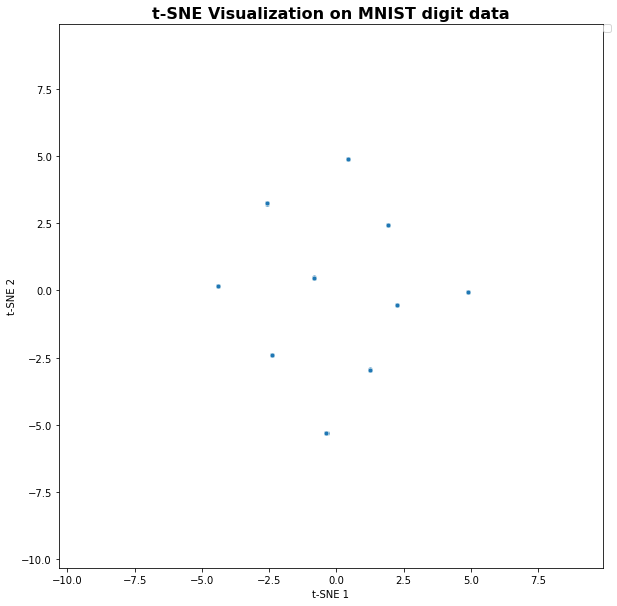

In [11]:
# Plotting the tsne data

fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', data = tsne_df, ax = ax, s=20)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE Visualization on MNIST digit data', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

In [12]:
# Since we will no longer need Mnist data, we can uninstall the package
%pip uninstall mnist
print("Successfully removed mnist")

Note: you may need to restart the kernel to use updated packages.
Successfully removed mnist
